## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [3]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

'wget' is not recognized as an internal or external command,
operable program or batch file.


1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_000637.txt')

#1
N = 20000
data = data[:N]
print(data.shape)

#2
x = max(data['BX_COUNTER'])+1
print(x)

#3, 4
def time(orbit, bx, tdc):
    orbit_time = x*25*orbit
    bx_time = 25*bx
    tdc_time = (25/30)*tdc
    return orbit_time+bx_time+tdc_time

data['TIME TAKEN'] = time(data['ORBIT_CNT'], data['BX_COUNTER'], data['TDC_MEAS'])
print(data.head())

total_time = ( max(data['TIME TAKEN']) - min(data['TIME TAKEN']) ) * (10**-9)
print('Total Time taken (in seconds): ', total_time)

#5
replace_list = pd.Series(np.random.choice([0, 1], size=N))
data['HEAD'] = replace_list
print(data.head())

#6
data = data[data['HEAD'] == 1]
data = data.reset_index(drop=True)
print(data.head())
print(data.shape)


(20000, 6)
3564
   HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS    TIME TAKEN
0     1     0          123  3869200167        2374        26  3.447457e+14
1     1     0          124  3869200167        2374        27  3.447457e+14
2     1     0           63  3869200167        2553        28  3.447457e+14
3     1     0           64  3869200167        2558        19  3.447457e+14
4     1     0           64  3869200167        2760        25  3.447457e+14
Total Time taken (in seconds):  0.0177345958125
   HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS    TIME TAKEN
0     0     0          123  3869200167        2374        26  3.447457e+14
1     1     0          124  3869200167        2374        27  3.447457e+14
2     0     0           63  3869200167        2553        28  3.447457e+14
3     0     0           64  3869200167        2558        19  3.447457e+14
4     0     0           64  3869200167        2760        25  3.447457e+14
   HEAD  FPGA  TDC_CHANNEL   ORBIT_C

A unit of tdc is (25/30)ns, while a unit of bx is 25 ns.  Thus, we see that bx = 30 tdc.  We aim to find a similar equation between bx and orbit.  We notice that the maximum value in the tdc series is 29, which makes sense since the actual maximum count is 30.  A similar logic can be applied to find x, and we say that max(bx)+1 can be a possible x, since nothing surpasses it.  Thus, orbit = x * bx is solved.

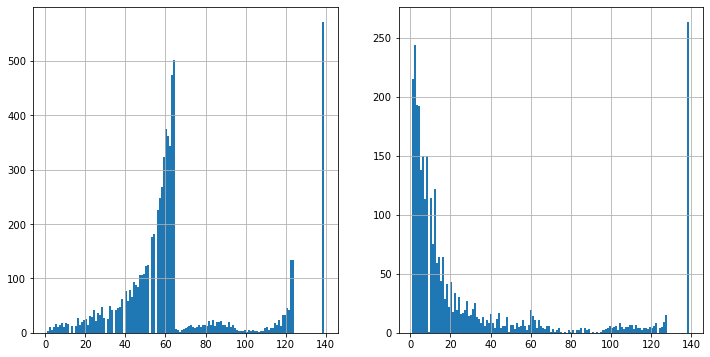

In [5]:
#7
fpga0 = data[data['FPGA']==0]['TDC_CHANNEL']
fpga1 = data[data['FPGA']==1]['TDC_CHANNEL']

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(fpga0, 139)
ax[0].grid(True)


ax[1].hist(fpga1, 139)
ax[1].grid(True)

In [6]:
#8
noisy_df = data[['HEAD', 'TDC_CHANNEL']].groupby('TDC_CHANNEL').count().sort_values(by='HEAD', ascending=False)
print(noisy_df)

noise_channels = noisy_df.index[:3]
print(noise_channels)

             HEAD
TDC_CHANNEL      
139           834
64            512
63            477
60            394
61            375
...           ...
107             5
97              5
125             4
67              4
52              3

[129 rows x 1 columns]
Int64Index([139, 64, 63], dtype='int64', name='TDC_CHANNEL')


In [7]:
#9
unique_orbits = data['ORBIT_CNT'].nunique()
print(unique_orbits)

orbits_139 = data[data['TDC_CHANNEL'] == 139]['ORBIT_CNT'].nunique()
print(orbits_139)

200
195
